# Tensorflow preview in 2018.11

## Session

In [1]:
# session 
import tensorflow as tf
mat1 = tf.constant([[3,3]])
mat2 = tf.constant([[2],[2]])
product  = tf.matmul(mat1,mat2) # 不进行回话运行的化是不会执行计算的

with tf.Session() as sess:
    p = sess.run(product)
p 

array([[12]])

## Variable

In [2]:
# Variable
s = tf.Variable(0,name = 'counter') 
one = tf.constant(1)
update = tf.add(s,one)
new_update = tf.assign(s,update)
init = tf.global_variables_initializer()  # 有Variable时必须要进行初始化
with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(new_update))

1
2
3


## Placeholder

In [3]:
type(init), type(update), type(new_update)

(tensorflow.python.framework.ops.Operation,
 tensorflow.python.framework.ops.Tensor,
 tensorflow.python.framework.ops.Tensor)

In [4]:
# placeholder
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
out = tf.multiply(input1,input2)
with tf.Session() as sess:
    res = sess.run(out, feed_dict={input1:[1.2],input2:[14.]})
    print(res)

[16.800001]


## Activation Function

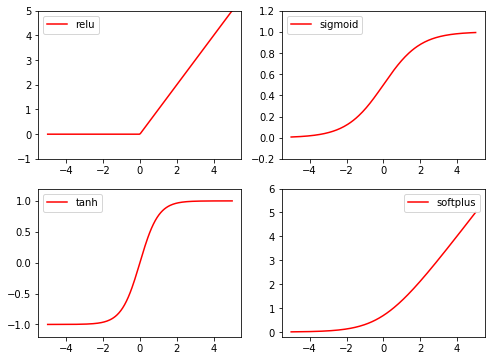

In [5]:
# AF （Active Function）
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5,5,200)
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

with tf.Session() as sess:
    y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

## Example:Regression

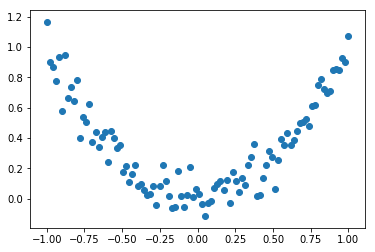

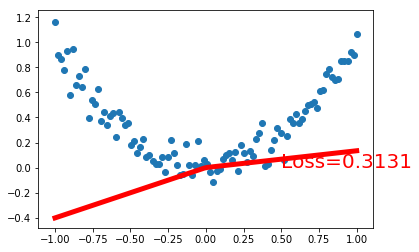

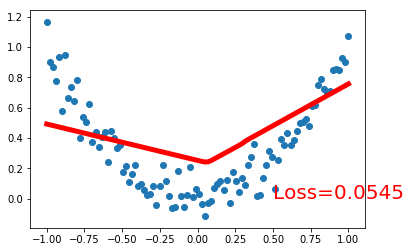

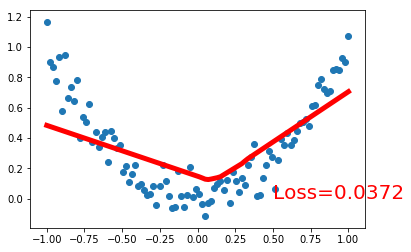

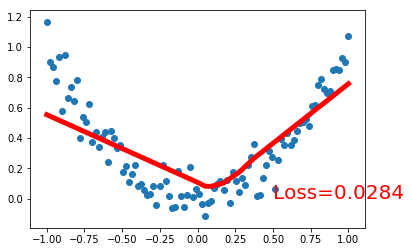

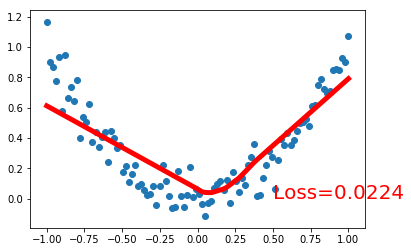

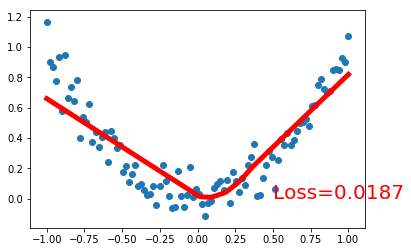

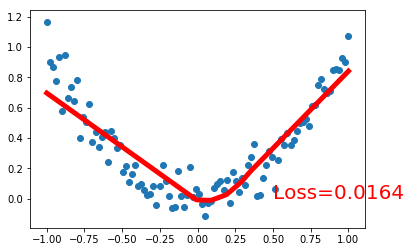

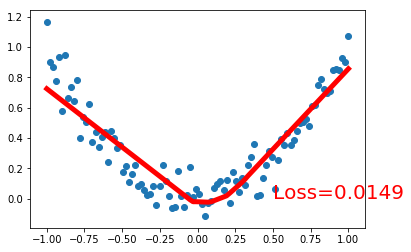

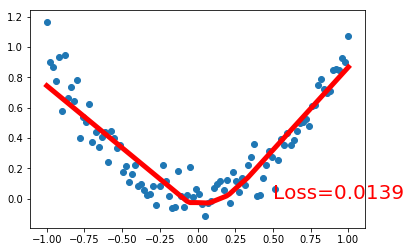

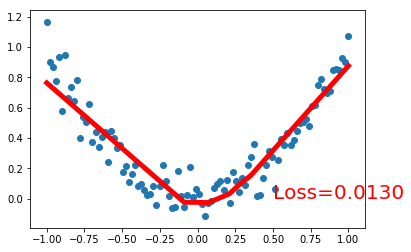

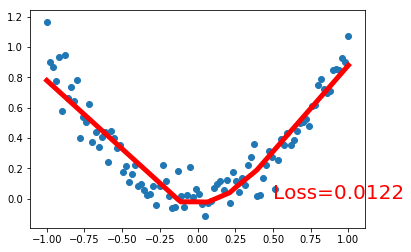

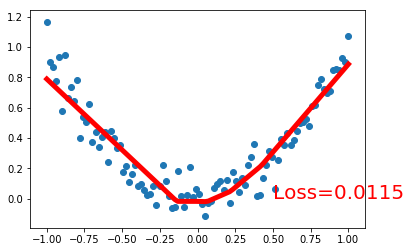

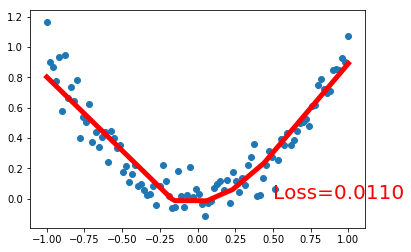

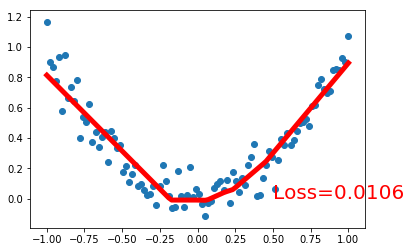

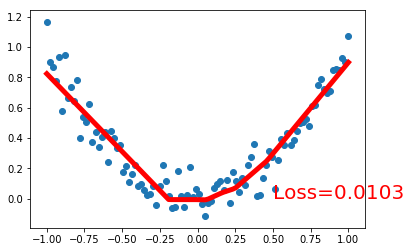

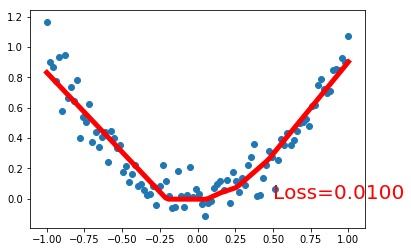

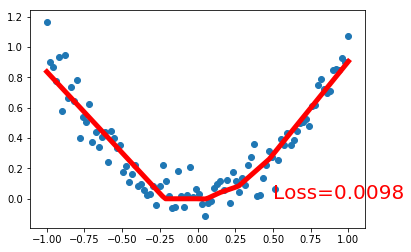

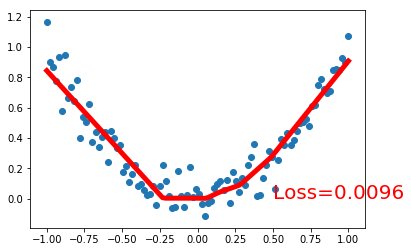

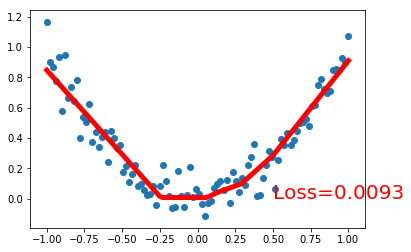

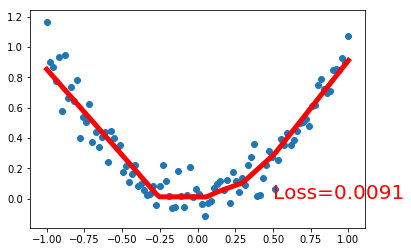

In [6]:
# 一个简单的回归示例
tf.set_random_seed(1)
np.random.seed(1)
# fake data
data_x = np.linspace(-1,1,100)[:,np.newaxis] # shape = [100,1] 其中100是指100个样本，1是指1个单元（维度）
noise = np.random.normal(0,0.1,size = data_x.shape)
data_y = np.power(data_x,2) + noise

plt.scatter(data_x,data_y)
plt.show()

# 定义网络参数
tf_x = tf.placeholder(tf.float32,shape = data_x.shape)
tf_y = tf.placeholder(tf.float32,shape = data_y.shape)

# 网络结构
l1 = tf.layers.dense(tf_x,10,activation= tf.nn.relu) # 自定义隐藏层的单元数
output = tf.layers.dense(l1,1,activation=None) # 输出层的单元数必须是维度

loss = tf.losses.mean_squared_error(data_y,output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)


sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

plt.ion()   # something about plotting

for step in range(100):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_x: data_x, tf_y: data_y})
    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(data_x, data_y)
        plt.plot(data_x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

## Optimizer

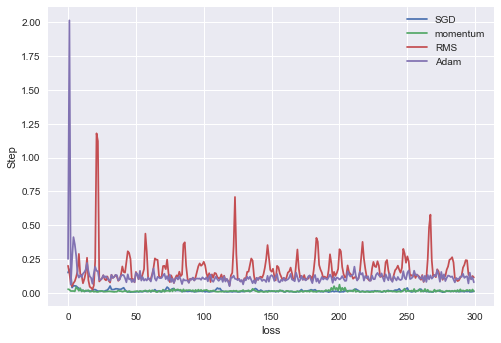

In [7]:
# Optimizer 各种优化方法对比
LR = 0.5
BATCH_SIZE = 32

tf.set_random_seed(1)
np.random.seed(1)

x = np.linspace(0,1,100)[:,np.newaxis]
noise = np.random.normal(0,0.1,size = x.shape)
y = np.power(x,2) + noise

class Net():
    def __init__(self,opt,**kwargs):
        self.x = tf.placeholder(tf.float32,[None,1])
        self.y = tf.placeholder(tf.float32,[None,1])
        l1 = tf.layers.dense(self.x,10,activation = tf.nn.relu)
        self.out = tf.layers.dense(l1,1,activation = None)
        self.loss = tf.losses.mean_squared_error(self.y,self.out)
        self.train_op = opt(learning_rate = LR,**kwargs).minimize(self.loss)

net_SGD = Net(tf.train.GradientDescentOptimizer)
net_momentum = Net(tf.train.MomentumOptimizer,momentum = 0.9)
net_RMS = Net(tf.train.RMSPropOptimizer)
net_adam = Net(tf.train.AdamOptimizer)

nets = [net_SGD, net_momentum, net_RMS, net_adam]

loss_l = [[],[],[],[]]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(300):
        index = np.random.randint(0,x.shape[0],BATCH_SIZE)
        data_x = x[index]
        data_y = y[index]
        for net,loss_item in zip(nets,loss_l):
            _, l = sess.run([net.train_op,net.loss],{net.x:data_x,net.y:data_y})
            loss_item.append(l)
            
# 绘图
plt.style.use('seaborn')
lengend = ['SGD','momentum','RMS','Adam']
for ind,item in enumerate(loss_l):
    plt.plot(item,label = lengend[ind])
# plt.ylim([0,0.2])
plt.legend()
plt.ylabel('Step')
plt.xlabel('loss')
plt.show()

## Tensorboard

![](https://ws1.sinaimg.cn/large/6af92b9fgy1fxfymrxcrrj20it0ehq3p.jpg)

In [9]:
import tensorflow as tf

with tf.variable_scope('sc1') as scope:
    v1 = tf.get_variable('v1',[1])
#     v11 = tf.get_variable('v1',[1])
with tf.variable_scope(scope,reuse = True):
    v2 = tf.get_variable('v1',[1])
# sess = tf.Session()
# sess.run(v2)

ValueError: Variable sc1/v1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "D:\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "D:\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3271, in create_op
    op_def=op_def)
  File "D:\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
